In [1]:
import pandas as pd
import requests
import json
from pprint import pprint
from math import radians
import numpy as np
import matplotlib.pyplot as plt
# Retrieve Google API key from config.py
from config import gkey
import math
import gmaps
import scipy.stats as st
import os

In [2]:
data_one_path = 'Resources/airbnbmark1.csv'
data_two_path = 'Resources/AB_NYC_2019.csv'
data_one = pd.read_csv(data_one_path)
data_two = pd.read_csv(data_two_path)

C:\Users\Saidah\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_one.head(1)

,id,name,summary,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",2845,50%,38%,f,Midtown,Midtown,Manhattan,...,365,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0.39


In [4]:
ident = data_one['id']
name = data_one['name']
rpm = data_one['reviews_per_month']
peoples = data_one['accommodates']
cleaning = data_one['cleaning_fee']
avg_rating = data_one['review_scores_rating']
accuracy = data_one['review_scores_rating']
cleanliness = data_one['review_scores_rating']
checkin = data_one['review_scores_checkin']
comm = data_one['review_scores_communication']
location = data_one['review_scores_location']
value = data_one['review_scores_value']

basic_info_df = pd.DataFrame({'ID': ident,
                             'Room Name': name,
                              'Accomodates': peoples,
                              'Cleaning Fee': cleaning,
                             'Reviews Per Month': rpm,
                             'Rating Score': avg_rating,
                             'Accuracy Score': accuracy,
                             'Cleanliness': cleanliness,
                             'Checkin Score': checkin,
                             'Communication Score': comm,
                             'Location Score': location,
                             'Value Score': value})
basic_info_df.head(2)

,ID,Room Name,Accomodates,Cleaning Fee,Reviews Per Month,Rating Score,Accuracy Score,Cleanliness,Checkin Score,Communication Score,Location Score,Value Score
0,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,10.0,10.0,9.0
1,3831,Cozy Entire Floor of Brownstone,3,NaN,4.69,90.0,90.0,90.0,10.0,9.0,10.0,9.0


In [5]:
ident2 = data_two['id']
host_id = data_two['host_id']
borough = data_two['neighbourhood_group']
neighborhood = data_two['neighbourhood']
lat = data_two['latitude']
lng = data_two['longitude']
room_type = data_two['room_type']
price = data_two['price']
review_num = data_two['number_of_reviews']
avail = data_two['availability_365']

In [6]:
basic_two_df = pd.DataFrame({'ID': ident2,
                            'Host ID': host_id,
                            'Borough': borough,
                            'Neighbourhood': neighborhood,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Type Room': room_type,
                            'Price (per night)': price,
                            'Number of Reviews': review_num,
                            'Availability per 365': avail})
basic_two_df

,ID,Host ID,Borough,Neighbourhood,Latitude,Longitude,Type Room,Price (per night),Number of Reviews,Availability per 365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,0,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,0,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,0,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,0,2


In [7]:
combined_data = pd.merge(basic_info_df, basic_two_df, on = 'ID')
cleaned_data = combined_data.dropna(how = 'any')
cleaned_data

,ID,Room Name,Accomodates,Cleaning Fee,Reviews Per Month,Rating Score,Accuracy Score,Cleanliness,Checkin Score,Communication Score,...,Value Score,Host ID,Borough,Neighbourhood,Latitude,Longitude,Type Room,Price (per night),Number of Reviews,Availability per 365
0,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,10.0,...,9.0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
1,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,10.0,...,9.0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
2,2595,Skylit Midtown Castle,2,$95.00,0.38,94.0,94.0,94.0,10.0,10.0,...,9.0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
6,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.59,90.0,90.0,90.0,10.0,10.0,...,9.0,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,74,129
7,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.60,90.0,90.0,90.0,10.0,10.0,...,9.0,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,74,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113091,35596905,CONEY ISLAND BEACH close to Manhattan New York,4,$100.00,0.28,100.0,100.0,100.0,10.0,10.0,...,10.0,29622548,Brooklyn,Coney Island,40.58101,-73.98514,Entire home/apt,149,0,297
113092,35706482,Trendy Williamsburg Apartment,2,$50.00,0.13,100.0,100.0,100.0,10.0,10.0,...,10.0,16342788,Brooklyn,Williamsburg,40.70690,-73.94521,Private room,79,0,342
113093,35948011,"Classic, Urban with a splash of Glam! Near M...",3,$119.00,2.42,97.0,97.0,97.0,10.0,10.0,...,10.0,269165235,Manhattan,East Village,40.72546,-73.98703,Entire home/apt,235,1,326
113094,36176586,BRAND NEW KING 2br Airports& Times Sq MINUTES ...,10,$80.00,2.50,85.0,85.0,85.0,9.0,8.0,...,9.0,272080566,Queens,Elmhurst,40.73480,-73.86906,Entire home/apt,199,0,157


In [8]:
# cleaned_data.to_csv('Resources/cleaned_data.csv')

In [9]:
#Find location for Manhattan, Brooklyn, and Bronx
boroughs_df = pd.read_csv("Resources/Boroughs.csv")
boroughs_df.head()


,Boroughs
0,The Bronx
1,Brooklyn
2,Manhattan


In [10]:
boroughs_df["borough lng"]= ""
boroughs_df["borough lat"]= ""
boroughs_df["attraction name"]= ""
boroughs_df["attraction lng"]= ""
boroughs_df["attraction lat"]= ""
boroughs_df

,Boroughs,borough lng,borough lat,attraction name,attraction lng,attraction lat
0,The Bronx,,,,,
1,Brooklyn,,,,,
2,Manhattan,,,,,


In [11]:
params = {"key": gkey}

for index, row in boroughs_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['Boroughs']
    state = 'New York'

    # update address key value
    params['address'] = f"{city},{state}"

    # make request
    boroughs_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
#     print(cities_lat_lng.url)
    
#     # convert to json
    boroughs_lat_lng = boroughs_lat_lng.json()

    boroughs_df.loc[index, "borough lat"] = boroughs_lat_lng["results"][0]["geometry"]["location"]["lat"]
    boroughs_df.loc[index, "borough lng"] = boroughs_lat_lng["results"][0]["geometry"]["location"]["lng"]

# # Visualize to confirm lat lng appear
boroughs_df.head()

,Boroughs,borough lng,borough lat,attraction name,attraction lng,attraction lat
0,The Bronx,-73.8648,40.8448,,,
1,Brooklyn,-73.9442,40.6782,,,
2,Manhattan,-73.9712,40.7831,,,


In [12]:
#Get locations for 1 attraction in each borough
params = {
    "radius": 10000,
    "types": "tourist_attraction",
    "key": gkey
}

for index, row in boroughs_df.iterrows():
    # get lat, lng from df
    lat = row["borough lat"]
    lng = row["borough lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    # Use the search term: "International Airport" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    attraction = requests.get(base_url, params=params)
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(attraction.url)

    # convert to json
    attraction = attraction.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        boroughs_df.loc[index, "attraction name"] = attraction["results"][0]["name"]
        boroughs_df.loc[index, "attraction lng"] = attraction["results"][0]["geometry"]["location"]["lng"]
        boroughs_df.loc[index, "attraction lat"] = attraction["results"][0]["geometry"]["location"]["lat"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
boroughs_df

,Boroughs,borough lng,borough lat,attraction name,attraction lng,attraction lat
0,The Bronx,-73.8648,40.8448,Bronx Zoo,-73.877,40.8506
1,Brooklyn,-73.9442,40.6782,Brooklyn Children's Museum,-73.944,40.6745
2,Manhattan,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813


In [13]:
boroughs_df = boroughs_df.rename(columns={'Boroughs':'Borough'})
boroughs_df

,Borough,borough lng,borough lat,attraction name,attraction lng,attraction lat
0,The Bronx,-73.8648,40.8448,Bronx Zoo,-73.877,40.8506
1,Brooklyn,-73.9442,40.6782,Brooklyn Children's Museum,-73.944,40.6745
2,Manhattan,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813


In [14]:
boroughs_df =boroughs_df.set_index('Borough')
boroughs_df

,borough lng,borough lat,attraction name,attraction lng,attraction lat
Borough,,,,,
The Bronx,-73.8648,40.8448,Bronx Zoo,-73.877,40.8506
Brooklyn,-73.9442,40.6782,Brooklyn Children's Museum,-73.944,40.6745
Manhattan,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813


In [15]:
boroughs_final = boroughs_df.rename(index={'The Bronx':'Bronx'})
boroughs_final

,borough lng,borough lat,attraction name,attraction lng,attraction lat
Borough,,,,,
Bronx,-73.8648,40.8448,Bronx Zoo,-73.877,40.8506
Brooklyn,-73.9442,40.6782,Brooklyn Children's Museum,-73.944,40.6745
Manhattan,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813


In [16]:
boroughs_final = boroughs_final.reset_index()
boroughs_final

,Borough,borough lng,borough lat,attraction name,attraction lng,attraction lat
0,Bronx,-73.8648,40.8448,Bronx Zoo,-73.877,40.8506
1,Brooklyn,-73.9442,40.6782,Brooklyn Children's Museum,-73.944,40.6745
2,Manhattan,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813


In [17]:
bnb_attr_merge = pd.merge(cleaned_data, boroughs_final, on = "Borough", how = 'outer')
bnb_attr_merge.head()

,ID,Room Name,Accomodates,Cleaning Fee,Reviews Per Month,Rating Score,Accuracy Score,Cleanliness,Checkin Score,Communication Score,...,Longitude,Type Room,Price (per night),Number of Reviews,Availability per 365,borough lng,borough lat,attraction name,attraction lng,attraction lat
0,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,10.0,...,-73.98377,Entire home/apt,225,45,355,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813
1,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,10.0,...,-73.98377,Entire home/apt,225,45,355,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813
2,2595,Skylit Midtown Castle,2,$95.00,0.38,94.0,94.0,94.0,10.0,10.0,...,-73.98377,Entire home/apt,225,45,355,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813
3,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.59,90.0,90.0,90.0,10.0,10.0,...,-73.97500,Entire home/apt,200,74,129,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813
4,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.60,90.0,90.0,90.0,10.0,10.0,...,-73.97500,Entire home/apt,200,74,129,-73.9712,40.7831,American Museum of Natural History,-73.974,40.7813


In [18]:
#drop columns that are not needed in the merged dataset
almost_final_df = bnb_attr_merge.drop(columns= ['borough lng','borough lat'])

In [19]:
close_final_df = almost_final_df.set_index('Borough')

In [20]:
close_final_df = close_final_df.drop(['Queens', 'Staten Island'])

In [21]:
close_final_df = close_final_df.reset_index()
close_final_df = close_final_df.drop_duplicates(subset = ['Room Name'])

In [22]:
close_final_df = close_final_df.reset_index().drop(columns = ['index'])

In [23]:
close_coord_df = close_final_df[['Latitude','Longitude','attraction lat','attraction lng']]
close_coord_df

,Latitude,Longitude,attraction lat,attraction lng
0,40.75362,-73.98377,40.7813,-73.974
1,40.74767,-73.97500,40.7813,-73.974
2,40.76489,-73.98493,40.7813,-73.974
3,40.71344,-73.99037,40.7813,-73.974
4,40.76076,-73.98867,40.7813,-73.974
...,...,...,...,...
24873,40.87852,-73.85003,40.8506,-73.877
24874,40.84328,-73.88173,40.8506,-73.877
24875,40.86259,-73.90359,40.8506,-73.877
24876,40.84321,-73.83129,40.8506,-73.877


In [24]:
close_coord_df['Latitude Distance'] = close_coord_df['Latitude'] - close_coord_df['attraction lat']
close_coord_df['Longitude Distance'] = close_coord_df['Longitude'] - close_coord_df['attraction lng']
close_coord_df

C:\Users\Saidah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Saidah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Latitude,Longitude,attraction lat,attraction lng,Latitude Distance,Longitude Distance
0,40.75362,-73.98377,40.7813,-73.974,-0.0277041,-0.0097818
1,40.74767,-73.97500,40.7813,-73.974,-0.0336541,-0.0010118
2,40.76489,-73.98493,40.7813,-73.974,-0.0164341,-0.0109418
3,40.71344,-73.99037,40.7813,-73.974,-0.0678841,-0.0163818
4,40.76076,-73.98867,40.7813,-73.974,-0.0205641,-0.0146818
...,...,...,...,...,...,...
24873,40.87852,-73.85003,40.8506,-73.877,0.0279251,0.0269682
24874,40.84328,-73.88173,40.8506,-73.877,-0.0073149,-0.0047318
24875,40.86259,-73.90359,40.8506,-73.877,0.0119951,-0.0265918
24876,40.84321,-73.83129,40.8506,-73.877,-0.0073849,0.0457082


In [25]:
a_mid = []
for dist in close_coord_df['Latitude Distance']:
    a_mid.append(math.sin(dist/ 2)**2)

In [26]:
b_start = []
for locs in close_coord_df['Latitude']:
    b_start.append(math.cos(locs))

In [27]:
b_mid = []
for locas in close_coord_df['attraction lat']:
    b_mid.append(math.cos(locs))

In [28]:
b_fin = []
for distas in close_coord_df['Longitude Distance']:
    b_fin.append(math.sin(distas / 2)**2)

In [29]:
geo_coords_df = pd.DataFrame({'a_mid': a_mid,
                             'b_start': b_start,
                             'b_mid': b_mid,
                             'b_fin': b_fin})

In [30]:
geo_coords_df['b'] = geo_coords_df['b_start'] * geo_coords_df['b_mid'] * geo_coords_df['b_fin']
geo_coords_df['a'] = geo_coords_df['b'] + geo_coords_df['a_mid']

In [31]:
c = []
for number in geo_coords_df['a']:
    c.append(2*math.atan2(math.sqrt(number),math.sqrt(1-number)))
geo_coords_df['c'] = c
geo_coords_df['Proximity'] = geo_coords_df['c']*52.80

In [32]:
final_df = close_final_df
final_df['Proximity (mi)'] = geo_coords_df['Proximity']

In [33]:
final_df

,Borough,ID,Room Name,Accomodates,Cleaning Fee,Reviews Per Month,Rating Score,Accuracy Score,Cleanliness,Checkin Score,...,Latitude,Longitude,Type Room,Price (per night),Number of Reviews,Availability per 365,attraction name,attraction lng,attraction lat,Proximity (mi)
0,Manhattan,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,...,40.75362,-73.98377,Entire home/apt,225,45,355,American Museum of Natural History,-73.974,40.7813,1.550960
1,Manhattan,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.59,90.0,90.0,90.0,10.0,...,40.74767,-73.97500,Entire home/apt,200,74,129,American Museum of Natural History,-73.974,40.7813,1.777736
2,Manhattan,5178,Large Furnished Room Near B'way,2,$15.00,3.53,84.0,84.0,84.0,9.0,...,40.76489,-73.98493,Private room,79,430,220,American Museum of Natural History,-73.974,40.7813,1.041993
3,Manhattan,5238,Cute & Cozy Lower East Side 1 bdrm,3,$40.00,1.27,94.0,94.0,94.0,10.0,...,40.71344,-73.99037,Entire home/apt,150,160,188,American Museum of Natural History,-73.974,40.7813,3.686422
4,Manhattan,5441,Central Manhattan/near Broadway,2,$0.00,1.58,97.0,97.0,97.0,10.0,...,40.76076,-73.98867,Private room,85,188,39,American Museum of Natural History,-73.974,40.7813,1.333401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24873,Bronx,35800600,BEDROOM - SAFE ZONE - NO HIDDEN FEES!,2,$15.00,1.85,80.0,80.0,80.0,8.0,...,40.87852,-73.85003,Private room,36,2,47,Bronx Zoo,-73.877,40.8506,2.049455
24874,Bronx,8265482,Cozy Private Room Near Bronx Zoo,2,$30.00,0.11,93.0,93.0,93.0,9.0,...,40.84328,-73.88173,Private room,79,3,179,Bronx Zoo,-73.877,40.8506,0.459987
24875,Bronx,26004876,Ivoire Realty,1,$30.00,0.11,93.0,93.0,93.0,9.0,...,40.86259,-73.90359,Private room,65,2,0,Bronx Zoo,-73.877,40.8506,1.540117
24876,Bronx,32475687,Two bedroom apartment close to subway,3,$40.00,3.13,97.0,97.0,97.0,10.0,...,40.84321,-73.83129,Entire home/apt,100,22,3,Bronx Zoo,-73.877,40.8506,2.444646


In [34]:
final_df['Cleaning Fee'] = final_df['Cleaning Fee'].str.replace('$', '')
final_df['Cleaning Fee'] = final_df['Cleaning Fee'].str.replace(',', '')

In [35]:
total_prices = []


# for row in ny_airbb_data_df.iterrows():
for index, row in final_df.iterrows():
   
    cleaning_fee = row['Cleaning Fee']

    base_fee = row['Price (per night)']

    total = int(base_fee) + float(cleaning_fee)

    total_prices.append(total)


In [36]:
final_df["Total Price (per night)"] = total_prices

In [37]:
def addlabels(boroughs, values) :
    for i in range(len(boroughs)):
        plt.text(i, values[i]/2, values[i], ha = 'center')

In [38]:
rating = ['100']
final_100_df = final_df[final_df['Rating Score'].isin(rating)]

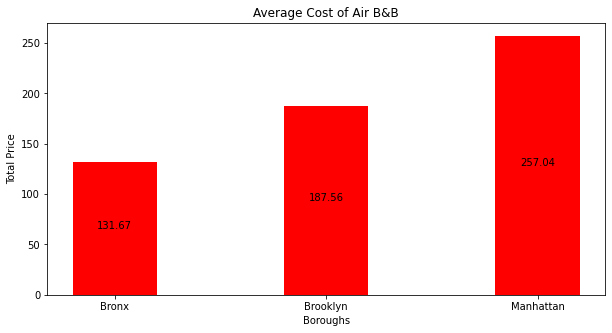

In [39]:
final_boroughs_df = round(final_df.groupby(["Borough"]).mean(),2)

boroughs = ['Bronx', 'Brooklyn', 'Manhattan']

values = final_boroughs_df['Total Price (per night)'].to_numpy()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs, values)
plt.xlabel("Boroughs")
plt.ylabel("Total Price")
plt.title("Average Cost of Air B&B")
plt.show()

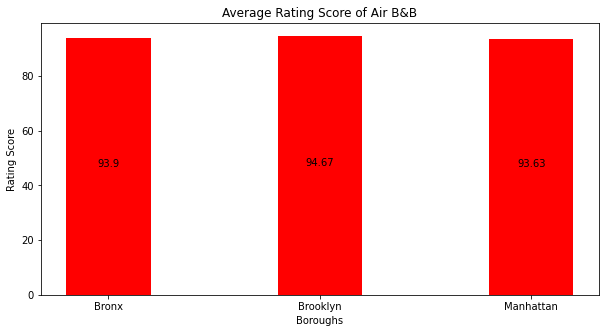

In [40]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']

values = final_boroughs_df['Rating Score'].to_numpy()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot

plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs,values)
plt.xlabel("Boroughs")
plt.ylabel("Rating Score")
plt.title("Average Rating Score of Air B&B")
plt.show()

In [41]:
# Heat map of all bnb

gmaps.configure(api_key = gkey)

In [42]:
lat_lng = final_df[["Latitude", "Longitude"]].astype(float)

rating = final_df["Rating Score"].astype(float)

In [43]:
fig = gmaps.figure(center=(46.0, -5.0), zoom_level=2)

rating_layer = gmaps.heatmap_layer(lat_lng, weights = rating, 
                                     dissipating = True, max_intensity = 100,
                                     point_radius = 3)
fig.add_layer(rating_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Heat map of highest rated bnb

lat_lng = final_100_df[["Latitude", "Longitude"]].astype(float)

rating = final_100_df["Rating Score"].astype(float)

fig = gmaps.figure(center=(46.0, -5.0), zoom_level=2)

rating_layer = gmaps.heatmap_layer(lat_lng, weights = rating, 
                                     dissipating = True, max_intensity = 100,
                                     point_radius = 3)
fig.add_layer(rating_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Do cost and ratings change when properties are closer to attractions?

In [45]:
#find the best proximity to attraction to get a better idea of how it could affect cost and rating

prox = [1.5,2,5,10]
for x in prox:
    if len(final_df[final_df['Proximity (mi)'] > x ].index) < 12000.000:
        print("Not enough data")
    else:
        print("Perfect")

Perfect
Not enough data
Not enough data
Not enough data


In [48]:
#limit data frame to only properties within a 1.5 mi radius by dropping any that have a radius from attraction > 1.5
prox_df = final_df.drop(final_df[final_df['Proximity (mi)'] > 1.5].index)

## Create bar charts for number of properties within 1.5 mi radius, avg price, and avg rating

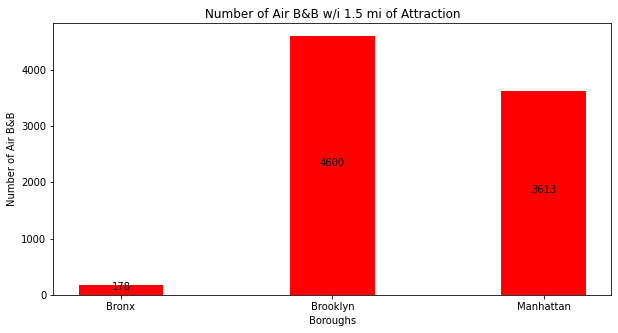

In [49]:
#Number of Air B&B w/i 1.5 mi of Attraction by Borough
prox_boroughs = prox_df.groupby(["Borough"]).count()
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']
values = prox_boroughs["ID"].to_numpy()


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs, values)
plt.xlabel("Boroughs")
plt.ylabel("Number of Air B&B")
plt.title("Number of Air B&B w/i 1.5 mi of Attraction")
plt.show()

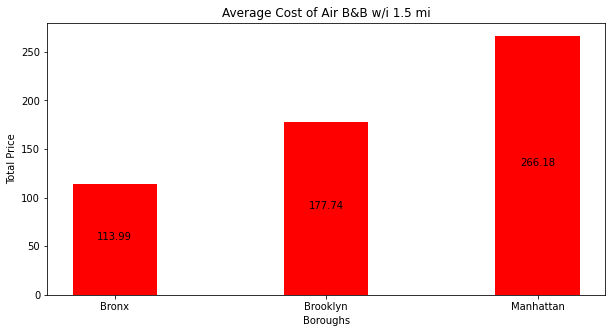

In [50]:
prox_boroughs = round(prox_df.groupby(["Borough"]).mean(),2)
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']
values = prox_boroughs['Total Price (per night)'].to_numpy()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs, values)
plt.xlabel("Boroughs")
plt.ylabel("Total Price")
plt.title("Average Cost of Air B&B w/i 1.5 mi")
plt.show()

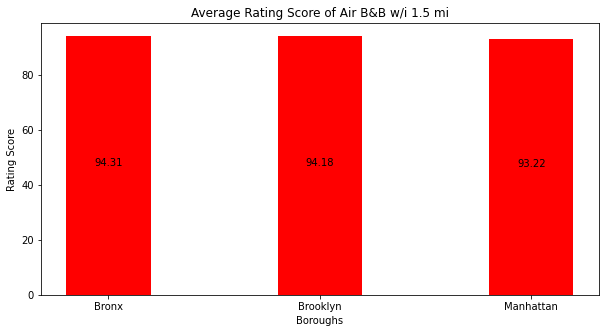

In [51]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']

values = prox_boroughs['Rating Score'].to_numpy()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot

plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs,values)
plt.xlabel("Boroughs")
plt.ylabel("Rating Score")
plt.title("Average Rating Score of Air B&B w/i 1.5 mi")
plt.show()

In [52]:
prox_df_2 = final_df.drop(final_df[final_df['Proximity (mi)'] < 1.5].index)

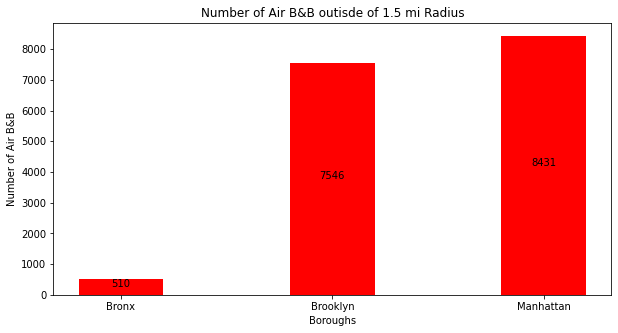

In [56]:
#Number of Air B&B w/i 1.5 mi of Attraction by Borough
prox_boroughs = prox_df_2.groupby(["Borough"]).count()
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']
values = prox_boroughs["ID"].to_numpy()


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs, values)
plt.xlabel("Boroughs")
plt.ylabel("Number of Air B&B")
plt.title("Number of Air B&B outisde of 1.5 mi Radius")
plt.show()

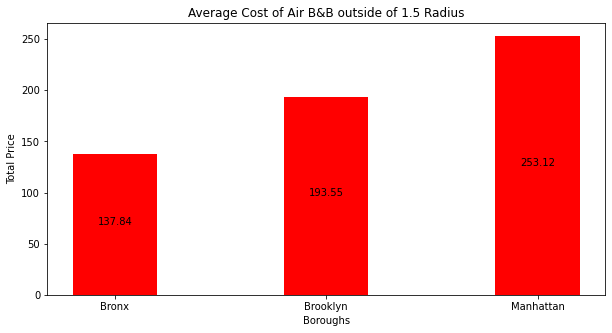

In [57]:
prox_boroughs = round(prox_df_2.groupby(["Borough"]).mean(),2)
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']
values = prox_boroughs['Total Price (per night)'].to_numpy()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs, values)
plt.xlabel("Boroughs")
plt.ylabel("Total Price")
plt.title("Average Cost of Air B&B outside of 1.5 Radius")
plt.show()

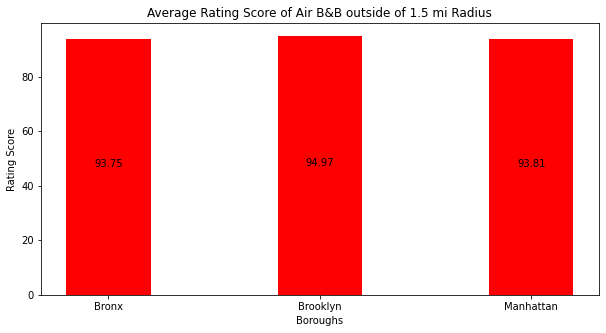

In [58]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']

values = prox_boroughs['Rating Score'].to_numpy()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot

plt.bar(boroughs, values, color ='r',
        width = 0.4)

addlabels(boroughs,values)
plt.xlabel("Boroughs")
plt.ylabel("Rating Score")
plt.title("Average Rating Score of Air B&B outside of 1.5 mi Radius")
plt.show()